# Chapter 4: Solving Differential Equations

## Galactic collisions

Module ```galcol``` contains functions for setup, numerical integration, and visualization

In [1]:
import galcol
import random
import math
import numpy as np
from astropy.constants import G

In [2]:
dir(galcol)

['Axes3D',
 'Circle',
 'FuncAnimation',
 'G',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anim_disk_2d',
 'anim_disk_3d',
 'anim_orbits',
 'anim_two_disks_2d',
 'anim_two_disks_3d',
 'evolve_disk',
 'evolve_two_disks',
 'evolve_two_disks_modified',
 'init_disk',
 'kpc',
 'np',
 'parameters',
 'plot_specific_orbital_energy',
 'plt',
 'show_disk_3d',
 'show_orbits',
 'show_orbits_3d',
 'show_orbits_3d_modified',
 'show_two_disks_2d',
 'show_two_disks_3d',
 'unit']

#### Example: Whirlpool-like galaxy

This is an example for a nearly edge-on collision. A smaller intruder galaxy moves under an angle of 45° in the $xy$-plane with an impact velocity of about 130 km/s toward a larger, more massive target galaxy. The impact parameter is 6 kpc in $z$-direction.

First we define the parameters of the intruder and target galaxies.

In [3]:
import galcol
import astropy.units as unit

In [4]:
galaxies = {
    'intruder' : galcol.parameters(
        # mass in solar masses
        1e10, 
        # disk radius in kpc
        5, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (0,0,10), 
        # x-, y-, z-components of initial velocity in km/s
        (0,0,-75),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        5, 
        # total number of stars
        1000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
    'target' : galcol.parameters(5e10, 10, (0,0,-10), (0,0,50), (0,0,1), 10, 4000, 0.025),
}

In [5]:
galaxies['intruder']

{'mass': <Quantity 1.e+10 solMass>,
 'radius': <Quantity 5. kpc>,
 'center_pos': <Quantity [ 0.,  0., 10.] kpc>,
 'center_vel': <Quantity [  0.,   0., -75.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 5,
 'N_stars': 1000,
 'softening': 0.025}

In [6]:
galcol.init_disk(galaxies['intruder'])
galcol.init_disk(galaxies['target'])

The dictionaries of the two galaxies now contain additional items, particularly the inititial data of the stars.

In [7]:
galaxies['target']

{'mass': <Quantity 5.e+10 solMass>,
 'radius': <Quantity 10. kpc>,
 'center_pos': <Quantity [  0.,   0., -10.] kpc>,
 'center_vel': <Quantity [ 0.,  0., 50.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 10,
 'N_stars': 4000,
 'softening': 0.025,
 'stars_pos': <Quantity [[ -0.03758155,   0.32835111,  -0.50032513, ...,  -4.64655559,
               8.81011173,  -1.11769221],
            [ -0.32417833,  -0.57942259,  -0.53080399, ...,  -8.39986123,
              -3.61158534,  -9.1291401 ],
            [-10.        , -10.        , -10.        , ..., -10.        ,
             -10.        , -10.        ]] kpc>,
 'stars_vel': <Quantity [[ 785.85822561,  505.96471459,  380.55979564, ...,
              130.91244413,   57.11495615,  151.76060876],
            [-194.48533988,  258.2451665 , -387.09520405, ...,
              -72.55328093,  139.00661414,  -18.71121157],
            [  50.        ,   50.        ,   50.        , ...,
               50.        ,   50.        ,   50.        ]] km / s>,
 

Solve equations of motion and visualize data.

# Special Project

## Galaxy Collision Simulation
* The code I used to generate the collision cannot run properly in a Jupyter notebook, as doing this crops the GIF. Please proceed to `galcol.py` (under the `if __name__ == "__main__"` condition) to see the code I used to generate the GIF I submitted.

## Specific Orbital Energy Plot

In [8]:
t, pos_data, vel_data = galcol.evolve_two_disks_modified(galaxies['target'], galaxies['intruder'], 
                                  N_steps=10000, N_snapshots=100, time_step=0.05*unit.Myr)

Solving equations of motion for two galaxies (Leapfrog integration)
100 % (stopped at t = 500.0 Myr)


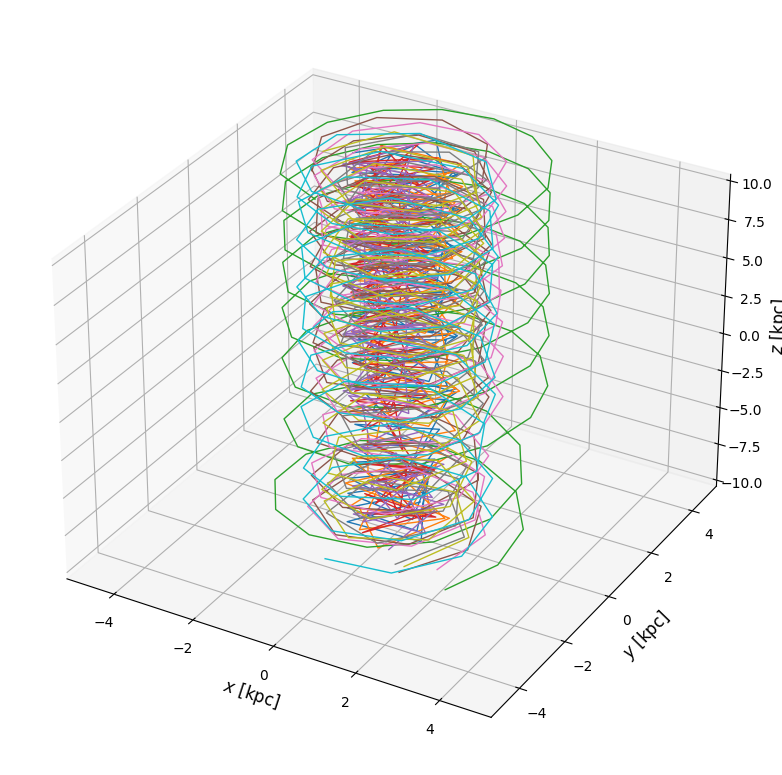

In [9]:
sample = random.sample(range(0, 1000), 10)
galcol.show_orbits_3d_modified(sample, pos_data, [-5,5], [-5,5], [-10,10])

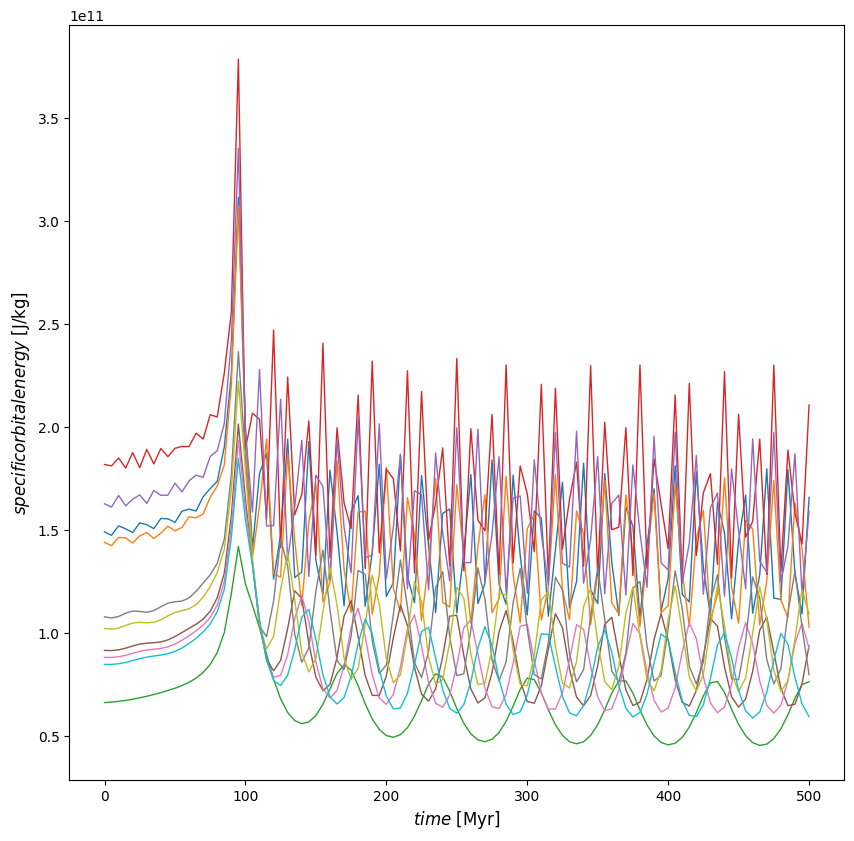

In [10]:
galcol.plot_specific_orbital_energy(
    galaxies['target']['mass'].to(unit.kg).value,
    galaxies['intruder']['mass'].to(unit.kg).value,
    sample, t, pos_data, vel_data
)

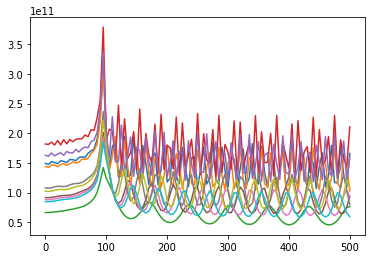

In [11]:
# plot_specific_orbital_energy test code 
import matplotlib.pyplot as plt

pos_data = pos_data.to(unit.m)
m_target = galaxies['target']['mass'].to(unit.kg).value
m_intruder = galaxies['intruder']['mass'].to(unit.kg).value

for n in sample:
    orbit = pos_data[:,:,n].transpose()
    velocity = vel_data[:,:,n].transpose()
    specific_energies = []

    for i in range(0, 101):
        d_to_target = math.sqrt((orbit[0][i].value - pos_data[i][0][1].value)**2 + (orbit[1][i].value - pos_data[i][1][1].value)**2 + (orbit[2][i].value - pos_data[i][2][1].value)**2)
        d_to_intruder = math.sqrt((orbit[0][i].value - pos_data[i][0][0].value)**2 + (orbit[1][i].value - pos_data[i][1][0].value)**2 + (orbit[2][i].value - pos_data[i][2][0].value)**2)
        current_vel = math.sqrt((velocity[0][i].value)**2 + (velocity[1][i].value)**2 + (velocity[2][i].value)**2)
        specific_energy = 0.5 * ((current_vel) ** 2) + G.value * m_target / d_to_target + G.value * m_intruder / d_to_intruder
        specific_energies = np.append(specific_energies, 0.5 * ((current_vel) ** 2) + G.value * m_target / d_to_target + G.value * m_intruder / d_to_intruder)

    plt.plot(t, specific_energies)

plt.show()
